# Projet 2
### Analyser des données de systèmes educatifs
Date de la soutenance  :  04/11/2020
## Problématique

Aider l'entreprise Academy dans son expansion à l'international dans le domaine E-learning. Le public cible de l'entreprise est les lycéens et les étudiants universitaires.


## Mission

Aider l'entreprise à prendre des décisions cruciales sur l'ouverture vers nouveaux pays en proposant une étude fiable de potentiel de marché en traitant un jeu de données fournie par la banque mondiale. Pour ce faire, il faut : 

- Préparer une liste de pays avec fort potentiel de clients 
- Estimer l'évolution de ce potentiel pour chacun de ces pays
- prioriser cette liste afin de lancer le projet


## Compétences évaluées

- Manipuler des données avec des librairies spécialisées
- Effectuer une représentation graphique à l'aide d'une librairie Python adaptée
- Utiliser un notebook Jupyter pour faciliter la rédaction du code et la collaboration
- Maîtriser les opérations fondamentales du langage Python pour la Data Science
- Mettre en place un environnement Python


# 1  Description des données de la banque mondiale

Nous commençons par décrire les données fournies et expliquer ses contenus: 


In [1]:
# import de librairies utiles
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import skew
from scipy.stats import kurtosis 
from datetime import datetime
from numpy import nanmean
from statistics import *
from pandas.plotting import scatter_matrix
from functools import reduce
from scipy.stats import pearsonr

In [2]:
# import des datasets
Country = pd.read_csv(r'D:\docs\OpenClassrooms\P02\Data\EdStatsCountry.csv',error_bad_lines=False,encoding='latin-1')
StatsData = pd.read_csv(r'D:\docs\OpenClassrooms\P02\Data\EdStatsData.csv')
Country_Series = pd.read_csv(r'D:\docs\OpenClassrooms\P02\Data\EdStatsCountry-Series.csv')
Series = pd.read_csv(r'D:\docs\OpenClassrooms\P02\Data\EdStatsSeries.csv')
FootNote = pd.read_csv(r'D:\docs\OpenClassrooms\P02\Data\EdStatsFootNote.csv')


### 1. a le fichier EdStatsCountry.csv

Ce fichier contient une liste des pays et des regions, avec des informations imporatantes comme le pourcentage de dépenses des gouvernement en éductation, les salaires annuels en dollars des professeurs dans chaque pays, le taux de l'analphabétisme ...etc

In [8]:
# On affiche quelques lignes tirées aléatoirmeent
Country.sample(3)

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data
180,QAT,Qatar,Qatar,State of Qatar,QA,Qatari riyal,NaN,Middle East & North Africa,High income: nonOECD,QA,...,Budgetary central government,General Data Dissemination System (GDDS),2010,"Multiple Indicator Cluster Survey (MICS), 2012",NaN,Yes,NaN,2010.0,2012.0,2005
130,LUX,Luxembourg,Luxembourg,Grand Duchy of Luxembourg,LU,Euro,A simple multiplier is used to convert the nat...,Europe & Central Asia,High income: OECD,LU,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,NaN,NaN,Yes,2010,2009.0,2012.0,1999
222,UMC,Upper middle income,Upper middle income,Upper middle income,XT,NaN,Upper middle income group aggregate. Upper-mid...,NaN,NaN,XT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# on affiche le nb de lignes et de colonne
Country.shape

(238, 31)

In [10]:
Country.size

7378

In [11]:
# Ici on calcule le nombre de valeurs manquantes
Country.isna().sum().sum()

2041

In [3]:
# affiche la repartition du fichier selon la colonne 'Region'
Country['Region'].value_counts()

Europe & Central Asia         57
Sub-Saharan Africa            48
Latin America & Caribbean     41
East Asia & Pacific           36
Middle East & North Africa    21
South Asia                     8
North America                  3
Name: Region, dtype: int64

Text(0.5, 1.0, 'Repartion des pays par region')

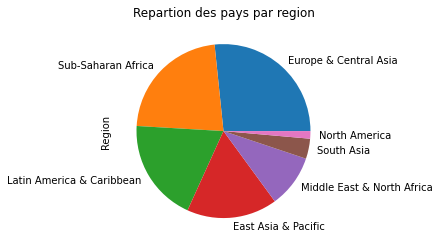

In [4]:
# Une autre façon plus sympa de voir le resultat
Country['Region'].value_counts().plot(kind='pie')
plt.title('Repartion des pays par region')

In [14]:
# Une fonction qui nous retourne des informations importantes comme le nombre de colonnes, nombre de lignes d'une datasets 
def decrire_dataset (fichier) :
    Nb_ligne = fichier.shape[0]
    Nb_colonne = fichier.shape[1]
    Taille = fichier.size
    Pct_Nan = round(fichier.isna().sum().sum()/fichier.size*100,0)
    print("Le fichier est de taille {} avec {} lignes et {} colonnes. Le fichier contient {} % devaleurs manquantes ".format(Taille, Nb_ligne, Nb_colonne, Pct_Nan ))

In [15]:
decrire_dataset(Country)

Le fichier est de taille 7378 avec 238 lignes et 31 colonnes. Le fichier contient 28.0 % devaleurs manquantes 


### 1. b le fichier EdStatsData.csv

Ce fichier décris les informations importantes telles le taux de scolarisations au différent cycle scolaires, le taux de population analphabète dans différents tranche d'age ...etc


In [16]:
StatsData.head(3)

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
StatsData.size

62085100

In [18]:
# nombre d'indicateurs
StatsData['Indicator Name'].nunique()

3665

In [19]:
decrire_dataset(StatsData)

Le fichier est de taille 62085100 avec 886930 lignes et 70 colonnes. Le fichier contient 86.0 % devaleurs manquantes 


Le fichier data contient plus de 3 600 indicateurs mesurées sur les pays et régions de puis 1970 jusqu'en 2100. Il contient des projections concernant les années futures.

### 1.c le fichier EdStatsCountry-Series.csv

Ce fichier contient les pays catégorisés par série et la source de cette catégorisation

In [20]:
Country_Series.shape

(613, 4)

In [21]:
Country_Series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CountryCode  613 non-null    object 
 1   SeriesCode   613 non-null    object 
 2   DESCRIPTION  613 non-null    object 
 3   Unnamed: 3   0 non-null      float64
dtypes: float64(1), object(3)
memory usage: 19.3+ KB


In [22]:
Country_Series['CountryCode'].nunique()

211

In [23]:
Country.shape

(238, 31)

In [24]:
Country_Series.sample(5)

,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
609,ZMB,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
485,SOM,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
233,HRV,SP.POP.TOTL,"Data sources : Croatian Bureau of Statistics, ...",NaN
86,CHI,SP.POP.1564.TO.ZS,"Refers to Guernsey, and Jersey.",NaN
89,CHI,SP.POP.TOTL.MA.ZS,"Refers to Guernsey, and Jersey.",NaN


In [25]:
Country_Series.size

2452

In [26]:
Country_Series["CountryCode"].nunique()

211

In [27]:
decrire_dataset(Country_Series)

Le fichier est de taille 2452 avec 613 lignes et 4 colonnes. Le fichier contient 25.0 % devaleurs manquantes 



### 1.e le fichier EdStatsFootNote.csv

Ce fichier contient une déscription plus détaillée de contenu de fichier EdStatsCountry-Series.csv sur la période de 1970 à 2050

In [28]:
FootNote.head(3)

,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.,NaN
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.,NaN
2,ABW,SE.PRE.TCHR.FE,YR2000,Country estimation.,NaN


In [29]:
FootNote.size

3218190

In [30]:
decrire_dataset(FootNote)

Le fichier est de taille 3218190 avec 643638 lignes et 5 colonnes. Le fichier contient 20.0 % devaleurs manquantes 


### 1.f le fichier EdStatsSeries.csv

Contient des informations cruciales comme le taux de l'éducation préscolaire, l'égalité dans l'éducation, financement des écoles et développement de la main-d'œuvre, système d'information destiné à la gestion de l'éducation  (la qualité de données, coverage de données sa précision et sa fiabilité)


In [31]:
Series.sample(3)

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
540,HH.MICS.OOST.L,Education Equality,MICS: Typology of out-of-school children. Prim...,Typology of out-of-school children. Primary. L...,Typology of out-of-school children. Primary. L...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,World Bank staff calculations based on Multipl...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2910,UIS.EA.S1.AG25T99.M,Attainment,UIS: Percentage of population age 25+ with som...,The percentage of male population (age 25 and ...,The percentage of male population (age 25 and ...,NaN,NaN,NaN,Single Level Attainment/ Not Cumulative,NaN,...,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2669,UIS.AFR.PBR.1.G6.PU.MATH,Primary,Africa Dataset: Average number of pupils per m...,NaN,Average number of Grade 6 pupils per mathemati...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
Series.size

76965

In [33]:
decrire_dataset(Series)

Le fichier est de taille 76965 avec 3665 lignes et 21 colonnes. Le fichier contient 72.0 % devaleurs manquantes 


# 2. Selection d'indicateur potentiellement utiles

Comme la domaine d'activié d'Academy est l'e-learning, je juge que ces indicateurs nous seront utiles à étudier:
- Population âgée de 15 à 24 ans, j'ai choisi cet indicateur car le public cible d'Academy est les lycéens et les étudiants univeristaires qui sont généralement âgés entre 15 et 24 an

- PIB / Habitat: cet indicateur est important peut nous donner une idée si la population d'un pays a les moyennes pour payer les frais de formations d'Academy

- le taux de personnes ayant un accès à internet :  cet indicateur est très important pour pouvoir avoir accès aux formations d'Academy qui sont disponible en ligne 

- Le nombre de personnes ayant un ordinateur portable : cet indicateur est important pour que l'utilisateur puisse suivre les formations en ligne

- Le pourcentage des dépenses dans l'éducation d'un pays rapport  le PIB : cet indicateur nous montre si le gouvernement est prêt à investir/accepter nos services dans leur terrtoires

- Le pourcentage des dépenses du gouvernement par rapport aux l'ensemble des dépenses publiques

- Taux net de scolarisation ajusté, secondaire supérieur : est important car ces étudiants sont le public cible d'academy

- Pourcentage d'écoles secondaires inférieures n'ayant accès à l'électricité: j'ai choisi cet indicateur car juge que dans les villages/villes où les écoles n'ont pas accès à l'électricité, il est très probable que ces villages/villes l'=ont pas non plus.
Sans l'électricité l'éducation en ligne est compliqué voire impossible, donc je recommande de ne pas lancer le projet dans ces pays dans un premier temps.

- Population âgée de 15 à 24 ans sans éducation : dans ce cluster se trouve beaucoup de personne n'ont pas réussit/ou non pas eu la chance d'avoir accès à l'éducation traditional, donc l'éducation en ligne va présenter pour eux une opportunité de continuer leur études supérieures.

- Salarie annuel de profs en dollar: j'ai choisi cet indicateur pour étudier la possibilté d'embauche de personnels dans ses pays pour élargir la clientèle d'academy. Ces personnels locaux pourront aider Academy à proposer de contenu dans la langue officielle de ces pays. 

- Niveau d'alphabétisation chez les adultes : Je recommande de ne pas lancer le projet dans les pays où le taux d'alphabétation est élévée car ce public auront plus de difficulté à utiliser les outils en ligne.

# 3 Création et manipulation d'un jeu de données propre

In [9]:
# liste de pays présents dans CountrySeries et Country ==> 211 pays
PaysValide = Country.loc[Country['Country Code'].isin(Country_Series['CountryCode'].unique().tolist()),'Short Name'].tolist()
RegionValide = Country["Region"].dropna().unique().tolist()

# liste des années de 1970 à 2100
annees = list(map(str,range(1970,2100,1)))

In [10]:
RegionValide

['Latin America & Caribbean',
 'South Asia',
 'Sub-Saharan Africa',
 'Europe & Central Asia',
 'Middle East & North Africa',
 'East Asia & Pacific',
 'North America']

In [11]:
# cette fonction permet la récupération des données des pays par indicateur 
def extract_indicateur(indicateur,category) :
    #fliter par indicateur
    FilteredData = StatsData[StatsData['Indicator Name'] == indicateur]
    
    ColonneAnnee = [yy for yy in annees if yy in FilteredData.columns]
    
    listToSend = 0
    
    if category.lower() == "country" :
        listToSend = PaysValide
    elif category.lower() == "region" :
        listToSend = RegionValide
        
    res = FilteredData[FilteredData['Country Name'].isin(listToSend)]
    
    res = res.dropna(how='all', subset=ColonneAnnee).dropna(axis=1, how='all')
        
    tab = Country[['Country Code','Region']]
    newRes = res.merge(tab,on='Country Code')
    return newRes

In [20]:
EducationExpenditure = extract_indicateur("Expenditure on education as % of total government expenditure (%)", "country")
EducationExpenditure = EducationExpenditure[['Country Name', '2011']]
EducationExpenditure = EducationExpenditure.sort_values(by='2011', ascending=True).head(10)
EducationExpenditure
#EducationExpenditure.sort_values(by='2011', ascending=False)

,Country Name,2011
82,Lebanon,5.73381
10,Azerbaijan,7.34655
27,Cambodia,7.68447
30,Central African Republic,7.82546
80,Lao PDR,8.01467
100,Monaco,8.07617
122,Romania,8.33493
71,Italy,8.43229
37,Croatia,8.51579
137,Sri Lanka,9.11016


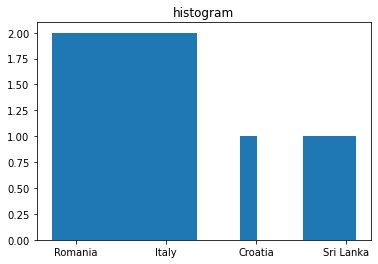

In [25]:
plt.hist(EducationExpenditure['Country Name'],bins = EducationExpenditure['2011'])
plt.title("histogram") 
plt.show()

##### Analyse exploratoire de la population 15-24

In [23]:
EducationExpenditure['2011']

82     5.73381
10     7.34655
27     7.68447
30     7.82546
80     8.01467
100    8.07617
122    8.33493
71     8.43229
37     8.51579
137    9.11016
Name: 2011, dtype: float64

In [37]:
pop1524TotalByCountry = extract_indicateur("Population, ages 15-24, total", "country")
pop1524TotalByCountry.shape

(176, 31)

In [38]:
pop1524TotalByCountry.head(3)

,Country Name,Country Code,Indicator Name,Indicator Code,1990,1991,1992,1993,1994,1995,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,Region
0,Afghanistan,AFG,"Population, ages 15-24, total",SP.POP.1524.TO.UN,2423555.0,2587510.0,2808220.0,3056374.0,3291124.0,3483752.0,...,5367499.0,5606736.0,5848604.0,6090239.0,6330684.0,6569239.0,6803785.0,7032072.0,7252785.0,South Asia
1,Albania,ALB,"Population, ages 15-24, total",SP.POP.1524.TO.UN,641446.0,629684.0,610552.0,587602.0,565873.0,549079.0,...,602317.0,607609.0,609841.0,608456.0,603104.0,594101.0,582411.0,569427.0,556269.0,Europe & Central Asia
2,Algeria,DZA,"Population, ages 15-24, total",SP.POP.1524.TO.UN,5158195.0,5306052.0,5459478.0,5620133.0,5789759.0,5968725.0,...,7433466.0,7403074.0,7340706.0,7245764.0,7118500.0,6964424.0,6795040.0,6625398.0,6467818.0,Middle East & North Africa


In [39]:
temp = pop1524TotalByCountry.drop(['Country Code','Region','Country Name','Indicator Name'],axis=1)
pop1524TotalByCountry['MEAN'] = temp.mean(axis=1)
pop1524TotalByCountry['MEDIAN'] = temp.median(axis=1)
pop1524TotalByCountry['STD'] = temp.std(axis=1)
pop1524TotalByCountry['VARIANCE'] = temp.var(axis=1)
pop1524TotalByCountry['CHANGE'] = 100.0 * ((temp['2015'] - temp['2000'])/temp['2000'])

pop1524TotalByCountry['SKEWNESS'] = temp.skew(axis=1)
pop1524TotalByCountry['KURTOSIS'] = temp.kurtosis(axis=1)

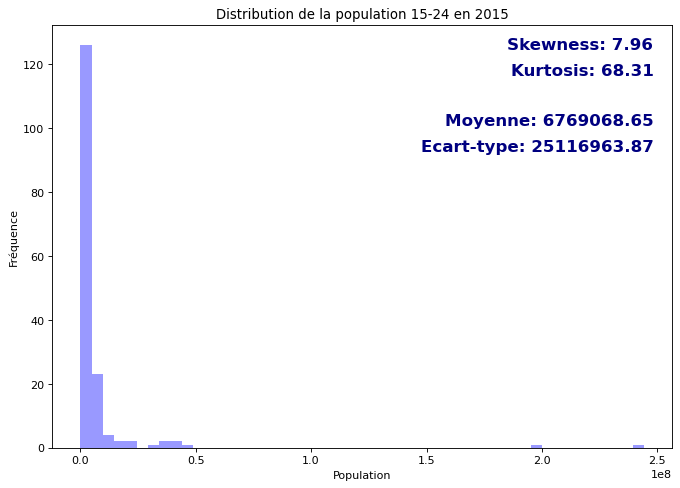

In [40]:
data = pop1524TotalByCountry['2015']
testdata = pop1524TotalByCountry['2015']

fig = plt.figure(figsize=(10, 7), dpi= 80)

ax = sns.distplot(pop1524TotalByCountry['2015'],kde=False,color="blue")
""""""
ax.text(x=0.97, y=0.97, transform=ax.transAxes, s="Skewness: %.2f" % pop1524TotalByCountry['2015'].skew(),\
        fontweight='demibold', fontsize=15, verticalalignment='top', horizontalalignment='right',\
        backgroundcolor='white', color='navy')
ax.text(x=0.97, y=0.91, transform=ax.transAxes, s="Kurtosis: %.2f" % pop1524TotalByCountry['2015'].kurt(),\
        fontweight='demibold', fontsize=15, verticalalignment='top', horizontalalignment='right',\
        backgroundcolor='white', color='navy')
ax.text(x=0.97, y=0.79, transform=ax.transAxes, s="Moyenne: %.2f" % pop1524TotalByCountry['2015'].mean(),\
        fontweight='demibold', fontsize=15, verticalalignment='top', horizontalalignment='right',\
        backgroundcolor='white', color='navy')
ax.text(x=0.97, y=0.73, transform=ax.transAxes, s="Ecart-type: %.2f" % pop1524TotalByCountry['2015'].std(),\
        fontweight='demibold', fontsize=15, verticalalignment='top', horizontalalignment='right',\
        backgroundcolor='white', color='navy')


plt.xlabel('Population')
plt.ylabel('Fréquence')
plt.title('Distribution de la population 15-24 en 2015')
plt.show()

In [41]:
colIdx = ['Country Code','Region','Country Name','MEAN','MEDIAN','STD','VARIANCE','CHANGE']
pop1524TotalByRegion = pop1524TotalByCountry[colIdx].groupby(['Region']).mean()
pop1524TotalByRegion.head(7)

,MEAN,MEDIAN,STD,VARIANCE,CHANGE
Region,,,,,
East Asia & Pacific,1.310096e+07,1.306797e+07,1.006209e+06,9.490865e+12,19.450600
Europe & Central Asia,2.225829e+06,2.238593e+06,2.025481e+05,1.105951e+11,-8.257562
Latin America & Caribbean,2.878795e+06,2.900061e+06,2.041426e+05,1.732933e+11,9.931883
Middle East & North Africa,1.915354e+06,1.954754e+06,2.705798e+05,1.691674e+11,22.099674
North America,1.509969e+07,1.507756e+07,1.211084e+06,3.947341e+12,10.508578
South Asia,3.527036e+07,3.560709e+07,4.924980e+06,9.120865e+13,29.645121
Sub-Saharan Africa,3.120248e+06,3.110758e+06,6.514935e+05,1.510884e+12,43.325447


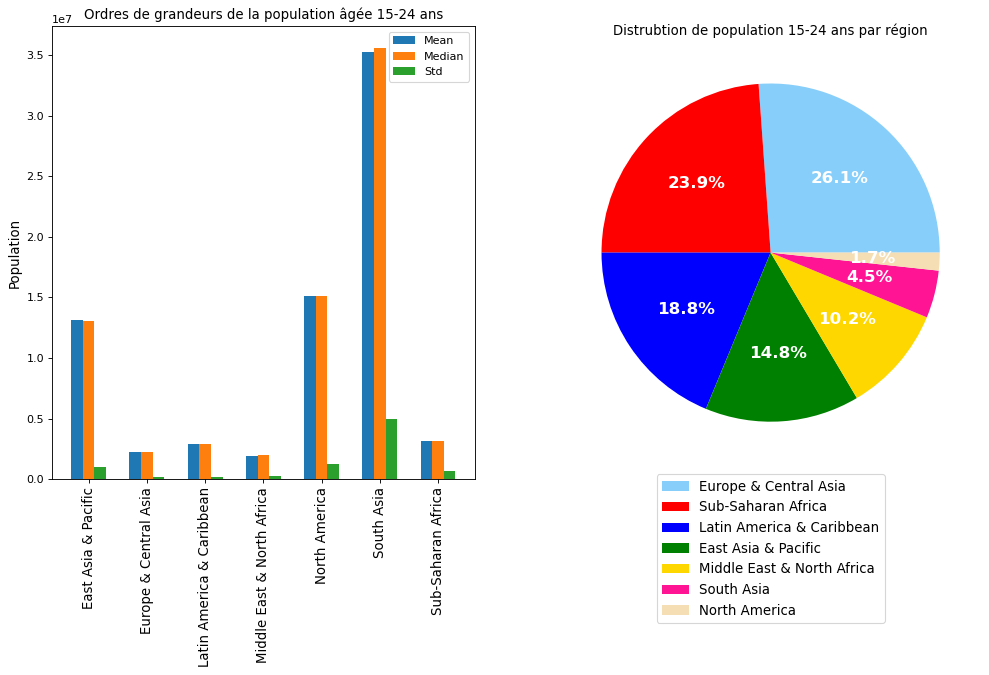

In [42]:
data = pop1524TotalByRegion[['MEAN','MEDIAN','STD']]
testDATA = pop1524TotalByRegion.loc['MEAN':]

width = 0.2
x = np.arange(len(data.index))

fig = plt.figure(figsize=(15, 7.5), dpi= 80, facecolor='w', edgecolor='k')

ax1 = plt.subplot(1,2, 1)

bar1 = ax1.bar(x - width,data['MEAN'].values,width,label='Mean')
bar2 = ax1.bar(x,data['MEDIAN'].values,width,label='Median')
bar3 = ax1.bar(x + width,data['STD'].values,width,label='Std')

ax1.set_ylabel('Population',fontsize=12)
ax1.set_title('Ordres de grandeurs de la population âgée 15-24 ans',fontsize=12)
ax1.set_xticks(x)
ax1.set_xticklabels(data.index,rotation=90,fontsize=12)
ax1.legend()

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%".format(pct, absolute)

colors = ['lightskyblue', 'red', 'blue', 'green', 'gold','deeppink','wheat']

ax2 = plt.subplot(1,2, 2)

wedges, texts, autotexts = ax2.pie(pop1524TotalByCountry['Region'].value_counts(),
                                   autopct=lambda pct: func(pct, pop1524TotalByCountry['Region'].value_counts())
                                   ,colors=colors,textprops=dict(color="w"))

ax2.legend(wedges, pop1524TotalByCountry['Region'].value_counts().index,
          loc="center",
          fontsize = 12,
          bbox_to_anchor=(0.25, -0.7, 0.5, 1))

ax2.set_title('Distrubtion de population 15-24 ans par région',fontsize=12)

plt.setp(autotexts, size=15, weight="bold")
plt.show()

In [43]:
pop1524TotalByCountry['Region'].value_counts()

Europe & Central Asia         46
Sub-Saharan Africa            42
Latin America & Caribbean     33
East Asia & Pacific           26
Middle East & North Africa    18
South Asia                     8
North America                  3
Name: Region, dtype: int64

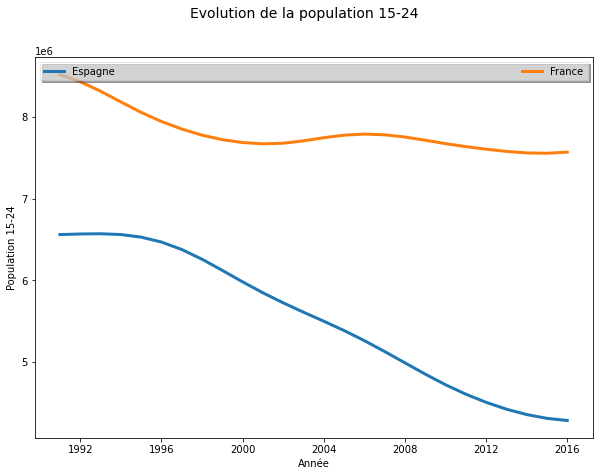

In [44]:
fig = plt.figure(figsize=(10, 7))
fig.suptitle("Evolution de la population 15-24", fontsize  = 14)
Date_Deb = datetime.strptime('1990-01-01','%Y-%m-%d')
Date_Fin= datetime.strptime('2015-12-31','%Y-%m-%d')
annees_ref = pd.date_range(Date_Deb,Date_Fin,freq='Y')

Espagne = pop1524TotalByCountry[pop1524TotalByCountry['Country Code']=='ESP'].loc[:,'1990':'2015']
France = pop1524TotalByCountry[pop1524TotalByCountry['Country Code']=='FRA'].loc[:,'1990':'2015']
plt.plot(annees_ref,Espagne.T,linewidth = 3.0, label='Espagne')
plt.plot(annees_ref,France.T,linewidth = 3.0, label='France')
#plt.ylim(0,100)

plt.xlabel('Année')
plt.ylabel('Population 15-24')

leg = plt.legend(loc='upper center', ncol=2, mode="expand", shadow=True, fancybox=False)
leg.get_frame().set_alpha(0.5)
plt.show()


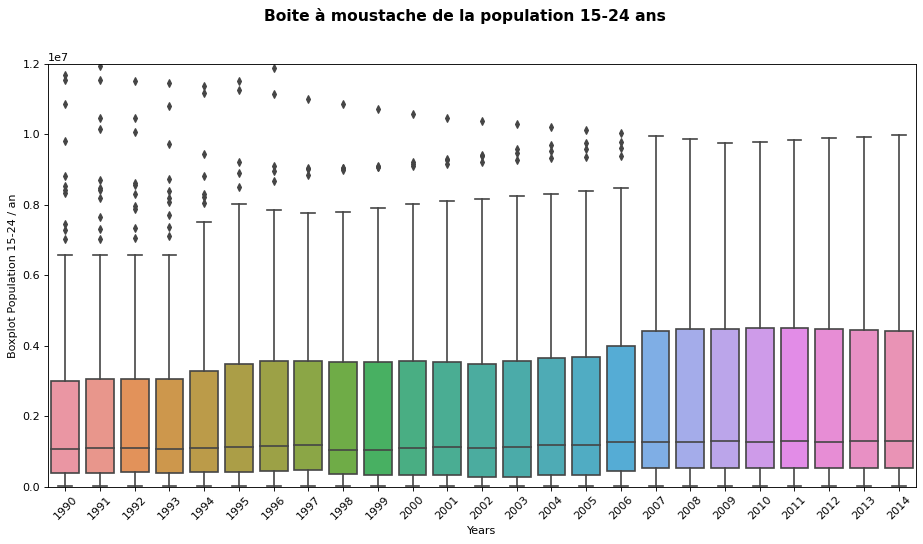

In [45]:
fig = plt.figure(figsize=(14, 7), dpi= 80, facecolor='w', edgecolor='k')

data = pop1524TotalByCountry.loc[:,'1990':'2014']

ax = sns.boxplot(x="variable",y="value",data = pd.melt(data))
ax.set_xticklabels(data.columns,rotation=45)
fig.suptitle('Boite à moustache de la population 15-24 ans ', fontsize=14, fontweight='bold')

plt.xlabel('Years')
plt.ylabel('Boxplot Population 15-24 / an')
plt.ylim(0,12000000)
plt.show()


Pour la lecture d'une boite à moustache (boxplot) cf: https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51

Nous verrons que le médiane n'a pas connu grand changement, par contre nous remarquons une augementation de la popluation au fils d'années. ce changement varie dépandant de la zone géographie, par exemple les pays les plus développés ont une démographie veiliassant contrairement aux pays les moins dévelopés, une des raisons de veilissement de démographie est le faible taux de natalité.


In [46]:
# prend en parametres une data set et un indicateur
# retourne une data set contient la liste des pays avec leurs moyennes trié de cet indicateur
def MeanByIndactedDataSet(dataset,IndicatorName) :
    countries = dataset.filter(regex='^1.*|^2.*')
    dfa = pd.DataFrame(columns=['Country Name',IndicatorName])
    columns = list(dfa)
    data = []
    arrCountryPop = []
    i = 0
    for ct in range(len(dataset)):  
        values = [dataset["Country Name"].iloc[i],int(np.nanmean(countries.iloc[i]))]
        zipped = zip(columns, values)
        a_dictionary = dict(zipped)
        data.append(a_dictionary)
        i = i + 1 
    dfa = dfa.append(data, True)
    return dfa


In [47]:
dfa = MeanByIndactedDataSet(pop1524TotalByCountry,'Pop1524')

In [48]:
PersonWithPc = extract_indicateur("Personal computers (per 100 people)", "country")

In [ ]:
sns.set()
sns.pairplot(StatsData, hue="Indicator Name")

###  Analyse exploratoire pib par habitat 


In [ ]:
PibHabitatByCountry = extract_indicateur("GDP per capita (current US$)", "country")

temp = PibHabitatByCountry .drop(['Country Code','Region','Country Name','Indicator Name'],axis=1)
PibHabitatByCountry ['MEAN'] = temp.mean(axis=1)
PibHabitatByCountry ['MEDIAN'] = temp.median(axis=1)
PibHabitatByCountry ['STD'] = temp.std(axis=1)
PibHabitatByCountry ['VARIANCE'] = temp.var(axis=1)
PibHabitatByCountry ['CHANGE'] = 100.0 * ((temp['2015'] - temp['2000'])/temp['2000'])

PibHabitatByCountry ['SKEWNESS'] = temp.skew(axis=1)
PibHabitatByCountry ['KURTOSIS'] = temp.kurtosis(axis=1)

In [ ]:
colIdx = ['Country Code','Region','Country Name','MEAN','MEDIAN','STD','VARIANCE','CHANGE']
pipHabitatByRegion= PibHabitatByCountry[colIdx].groupby(['Region']).mean()
pipHabitatByRegion.sort_values(by=['MEDIAN'],ascending = False)

In [ ]:
data = PibHabitatByCountry ['2015']
testdata = PibHabitatByCountry ['2015']

fig = plt.figure(figsize=(10, 7), dpi= 80)

ax = sns.distplot(PibHabitatByCountry ['2015'],kde=False,color="blue")
""""""
ax.text(x=0.97, y=0.97, transform=ax.transAxes, s="Skewness: %.2f" % PibHabitatByCountry ['2015'].skew(),\
        fontweight='demibold', fontsize=15, verticalalignment='top', horizontalalignment='right',\
        backgroundcolor='white', color='navy')
ax.text(x=0.97, y=0.91, transform=ax.transAxes, s="Kurtosis: %.2f" % PibHabitatByCountry ['2015'].kurt(),\
        fontweight='demibold', fontsize=15, verticalalignment='top', horizontalalignment='right',\
        backgroundcolor='white', color='navy')
ax.text(x=0.97, y=0.79, transform=ax.transAxes, s="Moyenne: %.2f" % PibHabitatByCountry ['2015'].mean(),\
        fontweight='demibold', fontsize=15, verticalalignment='top', horizontalalignment='right',\
        backgroundcolor='white', color='navy')
ax.text(x=0.97, y=0.73, transform=ax.transAxes, s="Ecart-type: %.2f" % PibHabitatByCountry ['2015'].std(),\
        fontweight='demibold', fontsize=15, verticalalignment='top', horizontalalignment='right',\
        backgroundcolor='white', color='navy')


plt.xlabel('Pib par habitat')
plt.ylabel('Fréquence')
plt.title('Distribution de Pib par habitat en 2015 par pays')
plt.show()

In [ ]:
colIdx = ['Country Code','Region','Country Name','MEAN','MEDIAN','STD','VARIANCE','CHANGE']
pipHabitatByRegion= PibHabitatByCountry[colIdx].groupby(['Region']).mean()

data = pipHabitatByRegion[['MEAN','MEDIAN','STD']]
testDATA = pipHabitatByRegion.loc['MEAN':]

width = 0.2
x = np.arange(len(data.index))

fig = plt.figure(figsize=(15, 7.5), dpi= 80, facecolor='w', edgecolor='k')

ax1 = plt.subplot(1,2, 1)

bar1 = ax1.bar(x - width,data['MEAN'].values,width,label='Mean')
bar2 = ax1.bar(x,data['MEDIAN'].values,width,label='Median')
bar3 = ax1.bar(x + width,data['STD'].values,width,label='Std')

ax1.set_ylabel('Pib par Habitat',fontsize=12)
ax1.set_title('Ordres de grandeurs de pib par Habitat entre 1990 et 2020 par région',fontsize=12)
ax1.set_xticks(x)
ax1.set_xticklabels(data.index,rotation=90,fontsize=12)
ax1.legend()

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%".format(pct, absolute)

colors = ['lightskyblue', 'red', 'blue', 'green', 'gold','deeppink','wheat']

ax2 = plt.subplot(1,2, 2)

wedges, texts, autotexts = ax2.pie(PibHabitatByCountry['Region'].value_counts(),
                                   autopct=lambda pct: func(pct, PibHabitatByCountry['Region'].value_counts())
                                   ,colors=colors,textprops=dict(color="w"))

ax2.legend(wedges, PibHabitatByCountry['Region'].value_counts().index,
          loc="center",
          fontsize = 12,
          bbox_to_anchor=(0.25, -0.7, 0.5, 1))

ax2.set_title('Pib par Habitat entre 1990 et 2020 par région',fontsize=12)

plt.setp(autotexts, size=15, weight="bold")
plt.show()


In [ ]:
PibHabitatByCountry[PibHabitatByCountry['Region']=='North America']

In [ ]:
pibHabitatByRegion = extract_indicateur("GDP per capita (current US$)", "region")
fig = plt.figure(figsize=(10, 7))
fig.suptitle("Evolution de la Pib par habitat par region", fontsize  = 14)
Date_Deb = datetime.strptime('1990-01-01','%Y-%m-%d')
Date_Fin= datetime.strptime('2015-12-31','%Y-%m-%d')
annees_ref = pd.date_range(Date_Deb,Date_Fin,freq='Y')

EastAsiaPacific = pibHabitatByRegion[pibHabitatByRegion['Country Name']=='East Asia & Pacific'].loc[:,'1990':'2015']
NorthAmerica = pibHabitatByRegion[pibHabitatByRegion['Country Name']=='North America'].loc[:,'1990':'2015']
EuropeCentralAsia = pibHabitatByRegion[pibHabitatByRegion['Country Name']=='Europe & Central Asia'].loc[:,'1990':'2015']
LatinAmericaCaribbean = pibHabitatByRegion[pibHabitatByRegion['Country Name']=='Latin America & Caribbean'].loc[:,'1990':'2015']
MiddleEastNorthAfrica = pibHabitatByRegion[pibHabitatByRegion['Country Name']=='Middle East & North Africa'].loc[:,'1990':'2015']
SouthAsia = pibHabitatByRegion[pibHabitatByRegion['Country Name']=='South Asia'].loc[:,'1990':'2015']
SubSaharanAfrica = pibHabitatByRegion[pibHabitatByRegion['Country Name']=='Sub-Saharan Africa'].loc[:,'1990':'2015']

plt.plot(annees_ref,EastAsiaPacific.T,linewidth = 3.0, label='East Asia & Pacific')
#plt.plot(annees_ref,NorthAmerica.T,linewidth = 3.0, label='North America')
plt.plot(annees_ref,EuropeCentralAsia.T,linewidth = 3.0, label='Europe & Central Asia')
plt.plot(annees_ref,LatinAmericaCaribbean.T,linewidth = 3.0, label='Latin America & Caribbean')
plt.plot(annees_ref,MiddleEastNorthAfrica.T,linewidth = 3.0, label='Middle East & North Africa')
plt.plot(annees_ref,SouthAsia.T,linewidth = 3.0, label='South Asia')
plt.plot(annees_ref,SubSaharanAfrica.T,linewidth = 3.0, label='Sub-Saharan Africa')
#plt.ylim(0,100)

plt.xlabel('Année')
plt.ylabel('Evolution de la Pib par habitat par region')

leg = plt.legend(loc='upper center', ncol=2, mode="expand", shadow=True, fancybox=False)
leg.get_frame().set_alpha(0.5)
plt.show()

### Analyse exploratoire utilisateur internet sur 100

In [ ]:
InternetUserPer100= extract_indicateur("Internet users (per 100 people)", "country")

temp = InternetUserPer100.drop(['Country Code','Region','Country Name','Indicator Name'],axis=1)
InternetUserPer100['MEAN'] = temp.mean(axis=1)
InternetUserPer100['MEDIAN'] = temp.median(axis=1)
InternetUserPer100['STD'] = temp.std(axis=1)
InternetUserPer100['VARIANCE'] = temp.var(axis=1)
InternetUserPer100['CHANGE'] = 100.0 * ((temp['2015'] - temp['2000'])/temp['2000'])

InternetUserPer100['SKEWNESS'] = temp.skew(axis=1)
InternetUserPer100['KURTOSIS'] = temp.kurtosis(axis=1)

colIdx = ['Country Code','Region','Country Name','MEAN','MEDIAN','STD','VARIANCE','CHANGE']
InternetUserPer100ParRegion= InternetUserPer100[colIdx].groupby(['Region']).mean()

data = InternetUserPer100ParRegion[['MEAN','MEDIAN','STD']]
testDATA = InternetUserPer100ParRegion.loc['MEAN':]

width = 0.2
x = np.arange(len(data.index))

fig = plt.figure(figsize=(15, 7.5), dpi= 80, facecolor='w', edgecolor='k')

ax1 = plt.subplot(1,2, 1)

bar1 = ax1.bar(x - width,data['MEAN'].values,width,label='Mean')
bar2 = ax1.bar(x,data['MEDIAN'].values,width,label='Median')
bar3 = ax1.bar(x + width,data['STD'].values,width,label='Std')

ax1.set_ylabel('Utilisateur internet/100',fontsize=12)
ax1.set_title('Ordres de grandeurs des utilisateurs internet par région',fontsize=12)
ax1.set_xticks(x)
ax1.set_xticklabels(data.index,rotation=90,fontsize=12)
ax1.legend()

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%".format(pct, absolute)

colors = ['lightskyblue', 'red', 'blue', 'green', 'gold','deeppink','wheat']

ax2 = plt.subplot(1,2, 2)

wedges, texts, autotexts = ax2.pie(InternetUserPer100['Region'].value_counts(),
                                   autopct=lambda pct: func(pct, InternetUserPer100['Region'].value_counts())
                                   ,colors=colors,textprops=dict(color="w"))

ax2.legend(wedges, InternetUserPer100['Region'].value_counts().index,
          loc="center",
          fontsize = 12,
          bbox_to_anchor=(0.25, -0.7, 0.5, 1))

ax2.set_title("Nombre d'utilisateurs internet (sur 100 personnes) par région",fontsize=12)

plt.setp(autotexts, size=15, weight="bold")
plt.show()



In [ ]:
fig = plt.figure(figsize=(14, 7), dpi= 80, facecolor='w', edgecolor='k')

data = InternetUserPer100.filter(regex='^1.*|^2.*')
ax = sns.boxplot(x="variable",y="value",data = pd.melt(data))
ax.set_xticklabels(data.columns,rotation=45)

plt.xlabel('Years')
plt.ylabel("Nombre d'utilisateur innternet  (per 100 personne)")
fig.suptitle("Boite à moustache d'utilisateur innternet  (per 100 personne) ", fontsize=14, fontweight='bold')

#plt.ylim(0,12000000)
plt.show()

Nous remarquons qu'au fils des années le nombre des utiliateurs d'internet augemente et l'inégalité entre les pays se réduit.

In [ ]:
InternetUserPer100ParRegion= extract_indicateur("Courbe d'évolution d'utilisateurs internet par région", "region")
fig = plt.figure(figsize=(10, 7))
fig.suptitle("Internet users (per 100 people) ", fontsize  = 14)
Date_Deb = datetime.strptime('1990-01-01','%Y-%m-%d')
Date_Fin= datetime.strptime('2015-12-31','%Y-%m-%d')
annees_ref = pd.date_range(Date_Deb,Date_Fin,freq='Y')

EastAsiaPacific = InternetUserPer100ParRegion[InternetUserPer100ParRegion['Country Name']=='East Asia & Pacific'].loc[:,'1990':'2015']
NorthAmerica = InternetUserPer100ParRegion[InternetUserPer100ParRegion['Country Name']=='North America'].loc[:,'1990':'2015']
EuropeCentralAsia = InternetUserPer100ParRegion[InternetUserPer100ParRegion['Country Name']=='Europe & Central Asia'].loc[:,'1990':'2015']
LatinAmericaCaribbean = InternetUserPer100ParRegion[InternetUserPer100ParRegion['Country Name']=='Latin America & Caribbean'].loc[:,'1990':'2015']
MiddleEastNorthAfrica = InternetUserPer100ParRegion[InternetUserPer100ParRegion['Country Name']=='Middle East & North Africa'].loc[:,'1990':'2015']
SouthAsia = InternetUserPer100ParRegion[InternetUserPer100ParRegion['Country Name']=='South Asia'].loc[:,'1990':'2015']
SubSaharanAfrica = InternetUserPer100ParRegion[InternetUserPer100ParRegion['Country Name']=='Sub-Saharan Africa'].loc[:,'1990':'2015']

plt.plot(annees_ref,EastAsiaPacific.T,linewidth = 3.0, label='East Asia & Pacific')
#plt.plot(annees_ref,NorthAmerica.T,linewidth = 3.0, label='North America')
plt.plot(annees_ref,EuropeCentralAsia.T,linewidth = 3.0, label='Europe & Central Asia')
plt.plot(annees_ref,LatinAmericaCaribbean.T,linewidth = 3.0, label='Latin America & Caribbean')
plt.plot(annees_ref,MiddleEastNorthAfrica.T,linewidth = 3.0, label='Middle East & North Africa')
plt.plot(annees_ref,SouthAsia.T,linewidth = 3.0, label='South Asia')
plt.plot(annees_ref,SubSaharanAfrica.T,linewidth = 3.0, label='Sub-Saharan Africa')
#plt.ylim(0,100)

plt.xlabel('Année')
plt.ylabel("Utilisateurs internet per 100 personnes")

leg = plt.legend(loc='upper center', ncol=2, mode="expand", shadow=True, fancybox=False)
leg.get_frame().set_alpha(0.5)
plt.show()

### Analyses exploratoire de taux de person ayant un pc  

In [ ]:
PersonWithPc= extract_indicateur("Personal computers (per 100 people)", "country")

temp = PersonWithPc.drop(['Country Code','Region','Country Name','Indicator Name'],axis=1)
PersonWithPc['MEAN'] = temp.mean(axis=1)
PersonWithPc['MEDIAN'] = temp.median(axis=1)
PersonWithPc['STD'] = temp.std(axis=1)
PersonWithPc['VARIANCE'] = temp.var(axis=1)
#PersonWithPc['CHANGE'] = 100.0 * ((temp['2010'] - temp['2000'])/temp['2000'])

PersonWithPc['SKEWNESS'] = temp.skew(axis=1)
PersonWithPc['KURTOSIS'] = temp.kurtosis(axis=1)

colIdx = ['Country Code','Region','Country Name','MEAN','MEDIAN','STD','VARIANCE']
PersonWithPcParRegion= PersonWithPc[colIdx].groupby(['Region']).mean()

data = PersonWithPcParRegion[['MEAN','MEDIAN','STD']]
testDATA = PersonWithPcParRegion.loc['MEAN':]

width = 0.2
x = np.arange(len(data.index))

fig = plt.figure(figsize=(15, 7.5), dpi= 80, facecolor='w', edgecolor='k')

ax1 = plt.subplot(1,2, 1)

bar1 = ax1.bar(x - width,data['MEAN'].values,width,label='Mean')
bar2 = ax1.bar(x,data['MEDIAN'].values,width,label='Median')
bar3 = ax1.bar(x + width,data['STD'].values,width,label='Std')

ax1.set_ylabel('Person with pc',fontsize=12)
ax1.set_title('Ordres de grandeurs de personnes ayant un pc par région',fontsize=12)
ax1.set_xticks(x)
ax1.set_xticklabels(data.index,rotation=90,fontsize=12)
ax1.legend()

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%".format(pct, absolute)

colors = ['lightskyblue', 'red', 'blue', 'green', 'gold','deeppink','wheat']

ax2 = plt.subplot(1,2, 2)

wedges, texts, autotexts = ax2.pie(PersonWithPc['Region'].value_counts(),
                                   autopct=lambda pct: func(pct, PersonWithPc['Region'].value_counts())
                                   ,colors=colors,textprops=dict(color="w"))

ax2.legend(wedges, PersonWithPc['Region'].value_counts().index,
          loc="center",
          fontsize = 12,
          bbox_to_anchor=(0.25, -0.7, 0.5, 1))

ax2.set_title('Distrubtion de taux de personne ayant un pc par région',fontsize=12)

plt.setp(autotexts, size=15, weight="bold")
plt.show()


In [ ]:
fig = plt.figure(figsize=(14, 7), dpi= 80, facecolor='w', edgecolor='k')

data = PersonWithPc.filter(regex='^1.*|^2.*')
ax = sns.boxplot(x="variable",y="value",data = pd.melt(data))
ax.set_xticklabels(data.columns,rotation=45)

plt.xlabel('Years')
plt.ylabel('Personal computers (per 100 person)')
fig.suptitle('Boite à moustache de taux de person ayant un pc ', fontsize=14, fontweight='bold')
#plt.ylim(0,12000000)
plt.show()


In [ ]:
PersonWithPcParRegion= extract_indicateur("Personal computers (per 100 people)", "region")
fig = plt.figure(figsize=(10, 7))
fig.suptitle("taux de person ayant un pc par region entre l'année 2000 et 2008", fontsize  = 14)
Date_Deb = datetime.strptime('1999-01-01','%Y-%m-%d')
Date_Fin= datetime.strptime('2007-12-31','%Y-%m-%d')
annees_ref = pd.date_range(Date_Deb,Date_Fin,freq='Y')

EastAsiaPacific = PersonWithPcParRegion[PersonWithPcParRegion['Country Name']=='East Asia & Pacific'].loc[:,'1999':'2007']
NorthAmerica = PersonWithPcParRegion[PersonWithPcParRegion['Country Name']=='North America'].loc[:,'1999':'2007']
EuropeCentralAsia = PersonWithPcParRegion[PersonWithPcParRegion['Country Name']=='Europe & Central Asia'].loc[:,'1999':'2007']
LatinAmericaCaribbean = PersonWithPcParRegion[PersonWithPcParRegion['Country Name']=='Latin America & Caribbean'].loc[:,'1999':'2007']
MiddleEastNorthAfrica = PersonWithPcParRegion[PersonWithPcParRegion['Country Name']=='Middle East & North Africa'].loc[:,'1999':'2007']
SouthAsia = PersonWithPcParRegion[PersonWithPcParRegion['Country Name']=='South Asia'].loc[:,'1999':'2007']
SubSaharanAfrica = PersonWithPcParRegion[PersonWithPcParRegion['Country Name']=='Sub-Saharan Africa'].loc[:,'1999':'2007']

plt.plot(annees_ref,EastAsiaPacific.T,linewidth = 3.0, label='East Asia & Pacific')
#plt.plot(annees_ref,NorthAmerica.T,linewidth = 3.0, label='North America')
plt.plot(annees_ref,EuropeCentralAsia.T,linewidth = 3.0, label='Europe & Central Asia')
plt.plot(annees_ref,LatinAmericaCaribbean.T,linewidth = 3.0, label='Latin America & Caribbean')
plt.plot(annees_ref,MiddleEastNorthAfrica.T,linewidth = 3.0, label='Middle East & North Africa')
plt.plot(annees_ref,SouthAsia.T,linewidth = 3.0, label='South Asia')
plt.plot(annees_ref,SubSaharanAfrica.T,linewidth = 3.0, label='Sub-Saharan Africa')
#plt.ylim(0,100)

plt.xlabel('Année')
plt.ylabel('Personal computers (per 100 people)')

leg = plt.legend(loc='upper center', ncol=2, mode="expand", shadow=True, fancybox=False)
leg.get_frame().set_alpha(0.5)
plt.show()


### Analyse exploratoire des dépenses en éducation du gouvernement par rapport aux l'ensemble des dépenses publiques

In [ ]:
EducationExpenditure = extract_indicateur("Expenditure on education as % of total government expenditure (%)", "country")

temp = EducationExpenditure.drop(['Country Code','Region','Country Name','Indicator Name'],axis=1)
EducationExpenditure['MEAN'] = temp.mean(axis=1)
EducationExpenditure['MEDIAN'] = temp.median(axis=1)
EducationExpenditure['STD'] = temp.std(axis=1)
EducationExpenditure['VARIANCE'] = temp.var(axis=1)
EducationExpenditure['CHANGE'] = 100.0 * ((temp['2015'] - temp['2000'])/temp['2000'])

EducationExpenditure['SKEWNESS'] = temp.skew(axis=1)
EducationExpenditure['KURTOSIS'] = temp.kurtosis(axis=1)

colIdx = ['Country Code','Region','Country Name','MEAN','MEDIAN','STD','VARIANCE','CHANGE']
EducationExpenditureParRegion= EducationExpenditure[colIdx].groupby(['Region']).mean()
EducationExpenditureParRegion

In [ ]:
EducationExpenditure = extract_indicateur("Expenditure on education as % of total government expenditure (%)", "country")

temp = EducationExpenditure.drop(['Country Code','Region','Country Name','Indicator Name'],axis=1)
EducationExpenditure['MEAN'] = temp.mean(axis=1)
EducationExpenditure['MEDIAN'] = temp.median(axis=1)
EducationExpenditure['STD'] = temp.std(axis=1)
EducationExpenditure['VARIANCE'] = temp.var(axis=1)
EducationExpenditure['CHANGE'] = 100.0 * ((temp['2015'] - temp['2000'])/temp['2000'])

EducationExpenditure['SKEWNESS'] = temp.skew(axis=1)
EducationExpenditure['KURTOSIS'] = temp.kurtosis(axis=1)

colIdx = ['Country Code','Region','Country Name','MEAN','MEDIAN','STD','VARIANCE','CHANGE']
EducationExpenditureParRegion= EducationExpenditure[colIdx].groupby(['Region']).mean()

data = EducationExpenditureParRegion[['MEAN','MEDIAN','STD']]
testDATA = EducationExpenditureParRegion.loc['MEAN':]

width = 0.2
x = np.arange(len(data.index))

fig = plt.figure(figsize=(15, 7.5), dpi= 80, facecolor='w', edgecolor='k')

ax1 = plt.subplot(1,2, 1)

bar1 = ax1.bar(x - width,data['MEAN'].values,width,label='Mean')
bar2 = ax1.bar(x,data['MEDIAN'].values,width,label='Median')
bar3 = ax1.bar(x + width,data['STD'].values,width,label='Std')

ax1.set_ylabel('Les dépenses en éducation',fontsize=12)
ax1.set_title('Ordres de grandeurs des dépenses en éducation par région',fontsize=12)
ax1.set_xticks(x)
ax1.set_xticklabels(data.index,rotation=90,fontsize=12)
ax1.legend()

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%".format(pct, absolute)

colors = ['lightskyblue', 'red', 'blue', 'green', 'gold','deeppink','wheat']

ax2 = plt.subplot(1,2, 2)

wedges, texts, autotexts = ax2.pie(EducationExpenditure['Region'].value_counts(),
                                   autopct=lambda pct: func(pct, EducationExpenditure['Region'].value_counts())
                                   ,colors=colors,textprops=dict(color="w"))

ax2.legend(wedges, EducationExpenditure['Region'].value_counts().index,
          loc="center",
          fontsize = 12,
          bbox_to_anchor=(0.25, -0.7, 0.5, 1))

ax2.set_title('Distrubtion des dépenses des états en éducation par région',fontsize=12)


plt.setp(autotexts, size=15, weight="bold")
plt.show()

In [ ]:
fig = plt.figure(figsize=(14, 7), dpi= 80, facecolor='w', edgecolor='k')
fig.suptitle('Boite à moustache des dépenses des états en éducation par région ', fontsize=14, fontweight='bold')


data = EducationExpenditure.filter(regex='^1.*|^2.*')
ax = sns.boxplot(x="variable",y="value",data = pd.melt(data))
ax.set_xticklabels(data.columns,rotation=45)

plt.xlabel('Years')
plt.ylabel('Boxplot Dépenses du gouvernement en éducation')

#plt.ylim(0,12000000)
plt.show()


In [ ]:
EducationExpenditureParRegion= extract_indicateur("Internet users (per 100 people)", "region")
fig = plt.figure(figsize=(10, 7))
fig.suptitle("Evolution de dépenses du gouvernement en éducation", fontsize  = 14)
Date_Deb = datetime.strptime('1990-01-01','%Y-%m-%d')
Date_Fin= datetime.strptime('2015-12-31','%Y-%m-%d')
annees_ref = pd.date_range(Date_Deb,Date_Fin,freq='Y')

EastAsiaPacific = EducationExpenditureParRegion[EducationExpenditureParRegion['Country Name']=='East Asia & Pacific'].loc[:,'1990':'2015']
NorthAmerica = EducationExpenditureParRegion[EducationExpenditureParRegion['Country Name']=='North America'].loc[:,'1990':'2015']
EuropeCentralAsia = EducationExpenditureParRegion[EducationExpenditureParRegion['Country Name']=='Europe & Central Asia'].loc[:,'1990':'2015']
LatinAmericaCaribbean = EducationExpenditureParRegion[EducationExpenditureParRegion['Country Name']=='Latin America & Caribbean'].loc[:,'1990':'2015']
MiddleEastNorthAfrica = EducationExpenditureParRegion[EducationExpenditureParRegion['Country Name']=='Middle East & North Africa'].loc[:,'1990':'2015']
SouthAsia = EducationExpenditureParRegion[EducationExpenditureParRegion['Country Name']=='South Asia'].loc[:,'1990':'2015']
SubSaharanAfrica = EducationExpenditureParRegion[EducationExpenditureParRegion['Country Name']=='Sub-Saharan Africa'].loc[:,'1990':'2015']

plt.plot(annees_ref,EastAsiaPacific.T,linewidth = 3.0, label='East Asia & Pacific')
#plt.plot(annees_ref,NorthAmerica.T,linewidth = 3.0, label='North America')
plt.plot(annees_ref,EuropeCentralAsia.T,linewidth = 3.0, label='Europe & Central Asia')
plt.plot(annees_ref,LatinAmericaCaribbean.T,linewidth = 3.0, label='Latin America & Caribbean')
plt.plot(annees_ref,MiddleEastNorthAfrica.T,linewidth = 3.0, label='Middle East & North Africa')
plt.plot(annees_ref,SouthAsia.T,linewidth = 3.0, label='South Asia')
plt.plot(annees_ref,SubSaharanAfrica.T,linewidth = 3.0, label='Sub-Saharan Africa')
#plt.ylim(0,100)

plt.xlabel('Année')
plt.ylabel('Dépenses du gouvernement en éducation')

leg = plt.legend(loc='upper center', ncol=2, mode="expand", shadow=True, fancybox=False)
leg.get_frame().set_alpha(0.5)
plt.show()


### Analyses exploratoire de salaires annuels des professeurs en dollars

In [ ]:
teacherAnnualSalary = extract_indicateur("Annual statutory teacher salaries in public institutions in USD. Upper Secondary. Starting salary", "country")

temp = teacherAnnualSalary.drop(['Country Code','Region','Country Name','Indicator Name'],axis=1)
teacherAnnualSalary['MEAN'] = temp.mean(axis=1)
teacherAnnualSalary['MEDIAN'] = temp.median(axis=1)
teacherAnnualSalary['STD'] = temp.std(axis=1)
teacherAnnualSalary['VARIANCE'] = temp.var(axis=1)
teacherAnnualSalary['CHANGE'] = 100.0 * ((temp['2015'] - temp['2000'])/temp['2000'])

teacherAnnualSalary['SKEWNESS'] = temp.skew(axis=1)
teacherAnnualSalary['KURTOSIS'] = temp.kurtosis(axis=1)

colIdx = ['Country Code','Region','Country Name','MEAN','MEDIAN','STD','VARIANCE','CHANGE']
teacherAnnualSalaryParRegion= teacherAnnualSalary[colIdx].groupby(['Region']).mean()

data = teacherAnnualSalaryParRegion[['MEAN','MEDIAN','STD']]
testDATA = teacherAnnualSalaryParRegion.loc['MEAN':]

width = 0.2
x = np.arange(len(data.index))

fig = plt.figure(figsize=(15, 7.5), dpi= 80, facecolor='w', edgecolor='k')

ax1 = plt.subplot(1,2, 1)

bar1 = ax1.bar(x - width,data['MEAN'].values,width,label='Mean')
bar2 = ax1.bar(x,data['MEDIAN'].values,width,label='Median')
bar3 = ax1.bar(x + width,data['STD'].values,width,label='Std')

ax1.set_ylabel('Salaire',fontsize=12)
ax1.set_title('Ordre de grandeurs de salaire annuel de professeurs en dollars par région ',fontsize=12)
ax1.set_xticks(x)
ax1.set_xticklabels(data.index,rotation=90,fontsize=12)
ax1.legend()

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%".format(pct, absolute)

colors = ['lightskyblue', 'red', 'blue', 'green', 'gold','deeppink','wheat']

ax2 = plt.subplot(1,2, 2)

wedges, texts, autotexts = ax2.pie(teacherAnnualSalary['Region'].value_counts(),
                                   autopct=lambda pct: func(pct, teacherAnnualSalary['Region'].value_counts())
                                   ,colors=colors,textprops=dict(color="w"))

ax2.legend(wedges, teacherAnnualSalary['Region'].value_counts().index,
          loc="center",
          fontsize = 12,
          bbox_to_anchor=(0.25, -0.7, 0.5, 1))

ax2.set_title('Salaire annuel de professeurs en dollars par région',fontsize=12)

plt.setp(autotexts, size=15, weight="bold")
plt.show()

In [ ]:
teacherAnnualSalaryParRegion= extract_indicateur("Annual statutory teacher salaries in public institutions in USD. Upper Secondary. Starting salary", "country")
fig = plt.figure(figsize=(10, 7))
fig.suptitle("Salaire annuel de profs en dollars de deux pays : la Pologne et le Portugal", fontsize  = 14)
Date_Deb = datetime.strptime('1999-01-01','%Y-%m-%d')
Date_Fin= datetime.strptime('2015-12-31','%Y-%m-%d')
annees_ref = pd.date_range(Date_Deb,Date_Fin,freq='Y')

Portugal = teacherAnnualSalaryParRegion[teacherAnnualSalaryParRegion['Country Name']=='Portugal'].loc[:,'1999':'2015']
Poland = teacherAnnualSalaryParRegion[teacherAnnualSalaryParRegion['Country Name']=='Poland'].loc[:,'1999':'2015']


#plt.plot(annees_ref,EastAsiaPacific.T,linewidth = 3.0, label='East Asia & Pacific')
plt.plot(annees_ref,Portugal.T,linewidth = 3.0, label='Portugal')
plt.plot(annees_ref,Poland.T,linewidth = 3.0, label='Poland')

#plt.ylim(0,100)

plt.xlabel('Année')
plt.ylabel('Salaire annuel de profs en dollars')

leg = plt.legend(loc='upper center', ncol=2, mode="expand", shadow=True, fancybox=False)
leg.get_frame().set_alpha(0.5)
plt.show()


In [ ]:
fig = plt.figure(figsize=(14, 7), dpi= 80, facecolor='w', edgecolor='k')

data = teacherAnnualSalaryParRegion.filter(regex='^1.*|^2.*')
ax = sns.boxplot(x="variable",y="value",data = pd.melt(data))
ax.set_xticklabels(data.columns,rotation=45)
ax.set_title('Boite à moustache des salaires annuels par an depuis 1999 par region',fontsize=12)
plt.xlabel('Years')
plt.ylabel('Salaire annuel de profs en dollars')
plt.show()


Depuis 1999, les pays présentent plus d'inégalité de point de vue de salaire annuels.

### Analyse exploratoire de taux d'alphabètisme chez les personnes âgées plus de 15 ans

In [ ]:
Adultliterate15Plus = extract_indicateur("Adult literacy rate, population 15+ years, both sexes (%)","country")

temp = AdultIlliterate15Plus.drop(['Country Code','Region','Country Name','Indicator Name'],axis=1)
Adultliterate15Plus['MEAN'] = temp.mean(axis=1)
Adultliterate15Plus['MEDIAN'] = temp.median(axis=1)
Adultliterate15Plus['STD'] = temp.std(axis=1)
Adultliterate15Plus['VARIANCE'] = temp.var(axis=1)
Adultliterate15Plus['CHANGE'] = 100.0 * ((temp['2015'] - temp['2000'])/temp['2000'])
Adultliterate15Plus['SKEWNESS'] = temp.skew(axis=1)
Adultliterate15Plus['KURTOSIS'] = temp.kurtosis(axis=1)

colIdx = ['Country Code','Region','Country Name','MEAN','MEDIAN','STD','VARIANCE','CHANGE']
Adultliterate15PlusParRegion= Adultliterate15Plus[colIdx].groupby(['Region']).mean()

data = Adultliterate15PlusParRegion[['MEAN','MEDIAN','STD']]
testDATA = Adultliterate15PlusParRegion.loc['MEAN':]

width = 0.2
x = np.arange(len(data.index))

fig = plt.figure(figsize=(15, 7.5), dpi= 80, facecolor='w', edgecolor='k')

ax1 = plt.subplot(1,2, 1)

bar1 = ax1.bar(x - width,data['MEAN'].values,width,label='Mean')
bar2 = ax1.bar(x,data['MEDIAN'].values,width,label='Median')
bar3 = ax1.bar(x + width,data['STD'].values,width,label='Std')

ax1.set_ylabel('Population',fontsize=12)
ax1.set_title('Ordres de grandeurs des adultes analphabètes âgés 15 ans et plus',fontsize=12)
ax1.set_xticks(x)
ax1.set_xticklabels(data.index,rotation=90,fontsize=12)
ax1.legend()

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%".format(pct, absolute)

colors = ['lightskyblue', 'red', 'blue', 'green', 'gold','deeppink','wheat']

ax2 = plt.subplot(1,2, 2)

wedges, texts, autotexts = ax2.pie(AdultIlliterate15Plus['Region'].value_counts(),
                                   autopct=lambda pct: func(pct, AdultIlliterate15Plus['Region'].value_counts())
                                   ,colors=colors,textprops=dict(color="w"))

ax2.legend(wedges, AdultIlliterate15Plus['Region'].value_counts().index,
          loc="center",
          fontsize = 12,
          bbox_to_anchor=(0.25, -0.7, 0.5, 1))
ax2.set_title("Le taux d'analphabétisme chez les adultes par region",fontsize=12)

plt.setp(autotexts, size=15, weight="bold")
plt.show()

# 4 . Creation du potentiel de marché de l'e-learning

In [9]:
# récuperation de données triées par indacteur 
InternetUserPer100 = extract_indicateur("Internet users (per 100 people)", "country")
pop1524TotalByCountry = extract_indicateur("Population, ages 15-24, total", "country")
PibHabitat = extract_indicateur("GDP per capita (current US$)", "country")
PersonWithPc = extract_indicateur("Personal computers (per 100 people)", "country")
EducationExpenditure = extract_indicateur("Expenditure on education as % of total government expenditure (%)", "country")
TauxScolarisationSecSup = extract_indicateur("Adjusted net enrolment rate, upper secondary, male (%)", "country")
teacherAnnualSalary = extract_indicateur("Annual statutory teacher salaries in public institutions in USD. Upper Secondary. Starting salary","country")
Adultliterate15Plus = extract_indicateur("Adult literacy rate, population 15+ years, both sexes (%)","country")
#AfricaEcolesAvecElectricete = extract_indicateur("Africa Dataset: Percentage of lower secondary schools with access to electricity (%)", "country")


### Calcul de l'année de réference par indicateur 

**Une année de réference** est l'année conentante le moins de valeurs nulles 

In [ ]:
# voici comment choisir l'année de référence 

# AdultIlliterate15Plus.isna().sum().sort_values(ascending=True) #ko
# teacherAnnualSalary.isna().sum().sort_values(ascending=True) # Ok Nan
#TauxScolarisationSecSup.isna().sum().sort_values(ascending=True) # ok Nan
#EducationExpenditure.isna().sum().sort_values(ascending=True) # ok
#PersonWithPc.isna().sum().sort_values(ascending=True) # ok => 2005
# PIB 2015
# hbitant 2015
# internet 2015
#Adultliterate15Plus.isna().sum() # 2016

In [10]:

#Récupération de la colonne de l'année de référence et la renommer 
InternetUserPer100 = InternetUserPer100[['Country Name', '2016']]
InternetUserPer100.columns = ['Country Name', 'InternetUserPer100']

pop1524TotalByCountry = pop1524TotalByCountry[['Country Name', '2015']]
pop1524TotalByCountry.columns = ['Country Name', 'pop1524TotalByCountry']

PibHabitat = PibHabitat[['Country Name', '2015']]
PibHabitat.columns = ['Country Name', 'PibHabitat']

PersonWithPc = PersonWithPc[['Country Name', '2005']]
PersonWithPc.columns = ['Country Name', 'PersonWithPc']

EducationExpenditure = EducationExpenditure[['Country Name', '2010']]
EducationExpenditure.columns = ['Country Name', 'EducationExpenditure']

TauxScolarisationSecSup = TauxScolarisationSecSup[['Country Name', '2014']]
TauxScolarisationSecSup.columns = ['Country Name', 'TauxScolarisationSecSup']

teacherAnnualSalary = teacherAnnualSalary[['Country Name', '2015']]
teacherAnnualSalary.columns = ['Country Name', 'teacherAnnualSalary']

#Adultliterate15Plus = AdultIlliterate15Plus[['Country Name', '2011']]
#Adultliterate15Plus.columns = ['Country Name', 'Adultliterate15Plus']


In [ ]:
#calculer le rang de chaque indicateur
InternetUserPer100['Rg_InternetUserPer100'] = InternetUserPer100['InternetUserPer100'].rank(method='average', numeric_only=None, na_option='keep', ascending=True)

pop1524TotalByCountry['Rg_pop1524TotalByCountry'] =  pop1524TotalByCountry['pop1524TotalByCountry'].rank(method='average', numeric_only=None, na_option='keep', ascending=True)

PibHabitat['Rg_PibHabitat'] =  PibHabitat['PibHabitat'].rank(method='average', numeric_only=None, na_option='keep', ascending=True)

PersonWithPc['Rg_PersonWithPc'] =  PersonWithPc['PersonWithPc'].rank(method='average', numeric_only=None, na_option='keep', ascending=True)

EducationExpenditure['Rg_EducationExpenditure'] =  EducationExpenditure['EducationExpenditure'].rank(method='average', numeric_only=None, na_option='keep', ascending=True)

TauxScolarisationSecSup['Rg_TauxScolarisationSecSup'] =  TauxScolarisationSecSup['TauxScolarisationSecSup'].rank(method='average', numeric_only=None, na_option='keep', ascending=True)

teacherAnnualSalary['Rg_teacherAnnualSalary'] =  teacherAnnualSalary['teacherAnnualSalary'].rank(method='average', numeric_only=None, na_option='keep', ascending=True)

Adultliterate15Plus['Rg_Adultliterate15Plus'] =  Adultliterate15Plus['Adultliterate15Plus'].rank(method='average', numeric_only=None, na_option='keep', ascending=True)

In [11]:
# Convertir la list de pays en dataframe pour faire jointure gauche afin d'avoir la liste de tous les pays 
dataframe_pays = pd.DataFrame(data=PaysValide, columns=["Country Name"])
dataframe_pays.shape

(211, 1)

In [12]:
# création de la table contienant les rangs de chaque indicateur
dfs = [dataframe_pays,pop1524TotalByCountry, InternetUserPer100, PibHabitat, PersonWithPc, EducationExpenditure,TauxScolarisationSecSup,teacherAnnualSalary]
result = reduce(lambda left,right: pd.merge(left,right,on='Country Name',how='left'), dfs)

In [13]:
prplot = result.drop('Country Name', axis=1)

In [16]:
prplot.corr(method ='pearson')

,pop1524TotalByCountry,InternetUserPer100,PibHabitat,PersonWithPc,EducationExpenditure,TauxScolarisationSecSup,teacherAnnualSalary
pop1524TotalByCountry,1.000000,-0.071447,-0.071536,-0.067796,-0.039535,-0.051427,0.125426
InternetUserPer100,-0.071447,1.000000,0.679724,0.715771,-0.210442,0.816508,0.478770
PibHabitat,-0.071536,0.679724,1.000000,0.858482,-0.178912,0.490322,0.800002
PersonWithPc,-0.067796,0.715771,0.858482,1.000000,-0.211088,0.572810,0.608413
EducationExpenditure,-0.039535,-0.210442,-0.178912,-0.211088,1.000000,-0.410474,0.178318
TauxScolarisationSecSup,-0.051427,0.816508,0.490322,0.572810,-0.410474,1.000000,-0.040166
teacherAnnualSalary,0.125426,0.478770,0.800002,0.608413,0.178318,-0.040166,1.000000


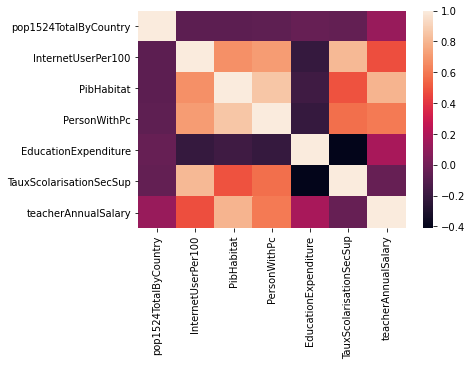

In [18]:
# graphique de correlation entre les indicateurs (et les rangs de ces indicateurs)
sns.heatmap(prplot.corr(method ='pearson'))

In [126]:
# ajout de la colonne moyenne à la dataframe en négligant les valeurs nulles
final_result = result.copy()
final_result['Rg_Total_Plan_A'] = result['Rg_InternetUserPer100']+result['Rg_pop1524TotalByCountry']+result['Rg_PibHabitat']+result['Rg_PersonWithPc']+result['Rg_EducationExpenditure']+result['Rg_TauxScolarisationSecSup']+result['Rg_teacherAnnualSalary']
final_result['Rg_Total_Plan_B'] = result['Rg_InternetUserPer100']+result['Rg_pop1524TotalByCountry']+result['Rg_EducationExpenditure']


***Plan A*** 

In [127]:
final_result.sort_values(by='Rg_Total_Plan_A', inplace= True, ascending=False)
final_result.head(10)

,Country Name,pop1524TotalByCountry,Rg_pop1524TotalByCountry,InternetUserPer100,Rg_InternetUserPer100,PibHabitat,Rg_PibHabitat,PersonWithPc,Rg_PersonWithPc,EducationExpenditure,...,2010,2011,2012,2013,2014,2015,2016,Region,Rg_Total_Plan_A,Rg_Total_Plan_B
198,United States,45147517.0,163.0,76.176737,137.0,56469.008969,171.0,77.272444,151.0,13.055140,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,756.0,353.0
143,Norway,646961.0,56.0,97.298204,178.0,74521.569932,175.0,59.359206,143.0,15.306020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,728.0,301.0
178,Sweden,1134811.0,77.0,91.506828,170.0,50812.190860,168.0,83.586531,153.0,12.985510,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,720.0,298.0
33,Switzerland,959002.0,65.0,89.405568,165.0,82016.021313,178.0,86.790933,155.0,15.398230,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,715.0,299.0
63,France,7567872.0,141.0,85.622200,158.0,36526.770108,154.0,56.961536,142.0,10.069130,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,704.0,319.0
52,Denmark,710024.0,58.0,96.967785,177.0,53012.996584,169.0,69.623744,149.0,15.103340,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,690.0,301.0
145,New Zealand,615099.0,52.0,88.470186,164.0,38201.574553,155.0,50.240475,139.0,16.930861,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,686.0,302.0
58,Spain,4285743.0,121.0,80.561333,153.0,25787.928792,147.0,27.657750,130.0,10.563980,...,894837.0,881504.0,835310.0,759798.0,750894.0,729349.0,687340.0,Europe & Central Asia,660.0,299.0
61,Finland,639391.0,54.0,87.703650,162.0,42419.565567,161.0,50.034614,138.0,11.945490,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,646.0,251.0
123,Mexico,20336734.0,156.0,59.540446,104.0,9152.872306,109.0,12.643158,103.0,19.429090,...,5732686.0,5481717.0,4967269.0,5313960.0,4879200.0,5055690.0,NaN,Latin America & Caribbean,633.0,361.0


#### Liste de pays plan b, calculer les pays qui sont en voie de développement 


In [128]:
final_result.sort_values(by='Rg_Total_Plan_B', inplace= True, ascending=False)
final_result.head(10)

,Country Name,pop1524TotalByCountry,Rg_pop1524TotalByCountry,InternetUserPer100,Rg_InternetUserPer100,PibHabitat,Rg_PibHabitat,PersonWithPc,Rg_PersonWithPc,EducationExpenditure,...,2010,2011,2012,2013,2014,2015,2016,Region,Rg_Total_Plan_A,Rg_Total_Plan_B
136,Malaysia,5332642.0,130.0,78.788310,145.0,9648.553455,113.0,21.668920,123.0,18.406231,...,1399849.0,NaN,NaN,NaN,NaN,NaN,NaN,East Asia & Pacific,NaN,372.0
67,United Kingdom,7731522.0,142.0,94.775801,175.0,44305.554632,164.0,75.730518,150.0,12.952480,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,367.0
123,Mexico,20336734.0,156.0,59.540446,104.0,9152.872306,109.0,12.643158,103.0,19.429090,...,5732686.0,5481717.0,4967269.0,5313960.0,4879200.0,5055690.0,NaN,Latin America & Caribbean,633.0,361.0
198,United States,45147517.0,163.0,76.176737,137.0,56469.008969,171.0,77.272444,151.0,13.055140,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,756.0,353.0
6,Argentina,6886530.0,138.0,70.150764,124.0,13467.102357,124.0,9.056130,93.0,15.824680,...,NaN,NaN,NaN,NaN,NaN,621457.0,NaN,Latin America & Caribbean,NaN,338.0
97,Japan,12157426.0,152.0,92.000000,171.0,34474.137360,150.0,NaN,NaN,9.457580,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,338.0
208,South Africa,9998431.0,151.0,54.000000,92.5,5773.483132,89.0,8.222196,91.0,18.044371,...,2539631.0,2496089.0,2306826.0,NaN,2226167.0,2168862.0,NaN,Sub-Saharan Africa,NaN,337.5
49,Germany,8682394.0,144.0,89.647101,166.0,41323.921502,159.0,59.640266,144.0,10.398110,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,332.0
10,Australia,2914620.0,109.0,88.238658,163.0,56554.038761,172.0,NaN,NaN,14.327600,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,332.0
81,"Hong Kong SAR, China",856743.0,64.0,87.300343,161.0,42351.024596,160.0,60.498825,145.0,20.150511,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,329.0


In [129]:
dfs = [dataframe_pays,pop1524TotalByCountry, InternetUserPer100, PersonWithPc, EducationExpenditure,TauxScolarisationSecSup,AdultIlliterate15Plus]
result = reduce(lambda left,right: pd.merge(left,right,on='Country Name',how='left'), dfs)

### Evolution du potentiel marché e-learning

In [130]:
InternetUserPer100 = extract_indicateur("Internet users (per 100 people)", "country")
pop1524TotalByCountry = extract_indicateur("Population, ages 15-24, total", "country")
PibHabitat = extract_indicateur("GDP per capita (current US$)", "country")
PersonWithPc = extract_indicateur("Personal computers (per 100 people)", "country")
EducationExpenditure = extract_indicateur("Expenditure on education as % of total government expenditure (%)", "country")
TauxScolarisationSecSup = extract_indicateur("Adjusted net enrolment rate, upper secondary, male (%)", "country")
teacherAnnualSalary = extract_indicateur("Annual statutory teacher salaries in public institutions in USD. Upper Secondary. Starting salary","country")
Adultliterate15Plus = extract_indicateur("Adult literacy rate, population 15+ years, both sexes (%)","country")

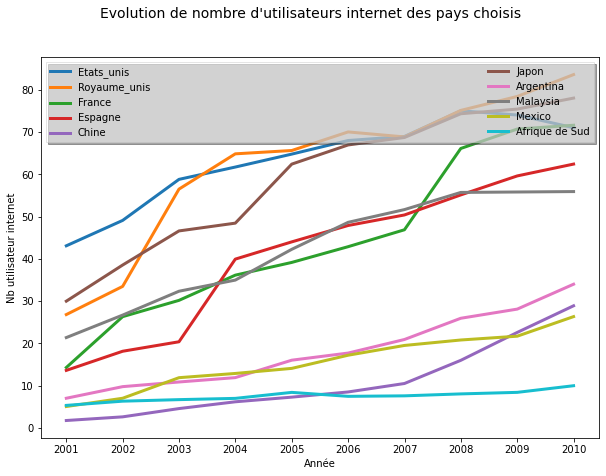

In [164]:
fig = plt.figure(figsize=(10, 7))
fig.suptitle("Evolution de nombre d'utilisateurs internet des pays choisis", fontsize  = 14)
Date_Deb = datetime.strptime('2000-01-01','%Y-%m-%d')
Date_Fin= datetime.strptime('2009-12-31','%Y-%m-%d')
annees_ref = pd.date_range(Date_Deb,Date_Fin,freq='Y')

Etats_unis   = InternetUserPer100[InternetUserPer100['Country Name'] == 'United States'].loc[:,'2000':'2009']
Royaume_unis = InternetUserPer100[InternetUserPer100['Country Name'] == 'United Kingdom'].loc[:,'2000':'2009']
France       = InternetUserPer100[InternetUserPer100['Country Name'] == 'France'].loc[:,'2000':'2009']
Espagne      = InternetUserPer100[InternetUserPer100['Country Name'] == 'Spain'].loc[:,'2000':'2009']
Chine        = InternetUserPer100[InternetUserPer100['Country Name'] == 'China'].loc[:,'2000':'2009']
Japon        = InternetUserPer100[InternetUserPer100['Country Name'] == 'Japan'].loc[:,'2000':'2009']
Argentina    = InternetUserPer100[InternetUserPer100['Country Name'] == 'Argentina'].loc[:,'2000':'2009']
Malaysia     = InternetUserPer100[InternetUserPer100['Country Name'] == 'Malaysia'].loc[:,'2000':'2009']
Mexico       = InternetUserPer100[InternetUserPer100['Country Name'] == 'Mexico'].loc[:,'2000':'2009']
South_Africa = InternetUserPer100[InternetUserPer100['Country Name'] == 'South Africa'].loc[:,'2000':'2009']


plt.plot(annees_ref,Etats_unis.T,linewidth = 3.0, label='Etats_unis')
plt.plot(annees_ref,Royaume_unis.T,linewidth = 3.0, label='Royaume_unis')

plt.plot(annees_ref,France.T,linewidth = 3.0, label='France')
plt.plot(annees_ref,Espagne.T,linewidth = 3.0, label='Espagne')

plt.plot(annees_ref,Chine.T,linewidth = 3.0, label='Chine')
plt.plot(annees_ref,Japon.T,linewidth = 3.0, label='Japon')
plt.plot(annees_ref,Argentina.T,linewidth = 3.0, label='Argentina')
plt.plot(annees_ref,Malaysia.T,linewidth = 3.0, label='Malaysia')
plt.plot(annees_ref,Mexico.T,linewidth = 3.0, label='Mexico')
plt.plot(annees_ref,South_Africa.T,linewidth = 3.0, label='Afrique de Sud')


plt.xlabel('Année')
plt.ylabel('Nb utilisateur internet')

leg = plt.legend(loc='upper center', ncol=2, mode="expand", shadow=True, fancybox=False)
leg.get_frame().set_alpha(0.5)
plt.show()

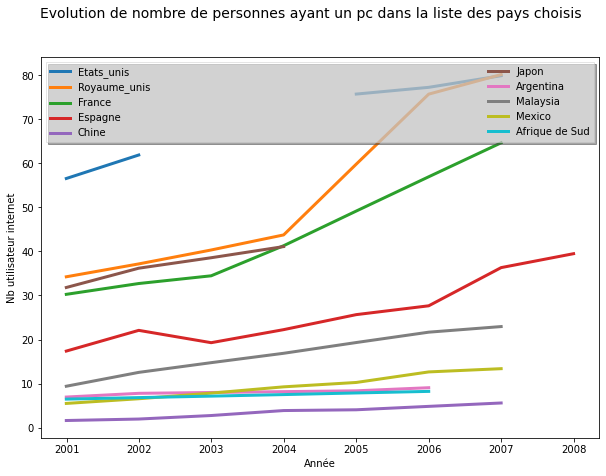

In [165]:
fig = plt.figure(figsize=(10, 7))
fig.suptitle("Evolution de nombre de personnes ayant un pc dans la liste des pays choisis", fontsize  = 14)
Date_Deb = datetime.strptime('2000-01-01','%Y-%m-%d')
Date_Fin= datetime.strptime('2009-12-31','%Y-%m-%d')
annees_ref = pd.date_range(Date_Deb,Date_Fin,freq='Y')

Etats_unis   = PersonWithPc[PersonWithPc['Country Name'] == 'United States'].loc[:,'2000':'2009']
Royaume_unis = PersonWithPc[PersonWithPc['Country Name'] == 'United Kingdom'].loc[:,'2000':'2009']
France       = PersonWithPc[PersonWithPc['Country Name'] == 'France'].loc[:,'2000':'2009']
Espagne      = PersonWithPc[PersonWithPc['Country Name'] == 'Spain'].loc[:,'2000':'2009']
Chine        = PersonWithPc[PersonWithPc['Country Name'] == 'China'].loc[:,'2000':'2009']
Japon        = PersonWithPc[PersonWithPc['Country Name'] == 'Japan'].loc[:,'2000':'2009']
Argentina    = PersonWithPc[PersonWithPc['Country Name'] == 'Argentina'].loc[:,'2000':'2009']
Malaysia     = PersonWithPc[PersonWithPc['Country Name'] == 'Malaysia'].loc[:,'2000':'2009']
Mexico       = PersonWithPc[PersonWithPc['Country Name'] == 'Mexico'].loc[:,'2000':'2009']
South_Africa = PersonWithPc[PersonWithPc['Country Name'] == 'South Africa'].loc[:,'2000':'2009']


plt.plot(annees_ref,Etats_unis.T,linewidth = 3.0, label='Etats_unis')
plt.plot(annees_ref,Royaume_unis.T,linewidth = 3.0, label='Royaume_unis')

plt.plot(annees_ref,France.T,linewidth = 3.0, label='France')
plt.plot(annees_ref,Espagne.T,linewidth = 3.0, label='Espagne')

plt.plot(annees_ref,Chine.T,linewidth = 3.0, label='Chine')
plt.plot(annees_ref,Japon.T,linewidth = 3.0, label='Japon')
plt.plot(annees_ref,Argentina.T,linewidth = 3.0, label='Argentina')
plt.plot(annees_ref,Malaysia.T,linewidth = 3.0, label='Malaysia')
plt.plot(annees_ref,Mexico.T,linewidth = 3.0, label='Mexico')
plt.plot(annees_ref,South_Africa.T,linewidth = 3.0, label='Afrique de Sud')


plt.xlabel('Année')
plt.ylabel('Nb utilisateur internet')

leg = plt.legend(loc='upper center', ncol=2, mode="expand", shadow=True, fancybox=False)
leg.get_frame().set_alpha(0.5)
plt.show()

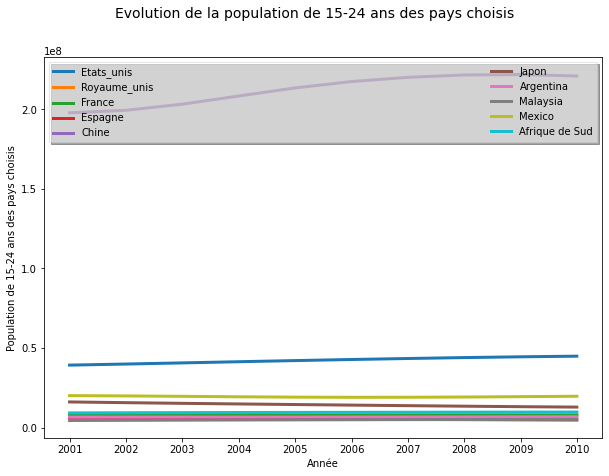

In [166]:
fig = plt.figure(figsize=(10, 7))
fig.suptitle("Evolution de la population de 15-24 ans des pays choisis", fontsize  = 14)
Date_Deb = datetime.strptime('2000-01-01','%Y-%m-%d')
Date_Fin= datetime.strptime('2009-12-31','%Y-%m-%d')
annees_ref = pd.date_range(Date_Deb,Date_Fin,freq='Y')

Etats_unis   = pop1524TotalByCountry[pop1524TotalByCountry['Country Name'] == 'United States'].loc[:,'2000':'2009']
Royaume_unis = pop1524TotalByCountry[pop1524TotalByCountry['Country Name'] == 'United Kingdom'].loc[:,'2000':'2009']
France       = pop1524TotalByCountry[pop1524TotalByCountry['Country Name'] == 'France'].loc[:,'2000':'2009']
Espagne      = pop1524TotalByCountry[pop1524TotalByCountry['Country Name'] == 'Spain'].loc[:,'2000':'2009']
Chine        = pop1524TotalByCountry[pop1524TotalByCountry['Country Name'] == 'China'].loc[:,'2000':'2009']
Japon        = pop1524TotalByCountry[pop1524TotalByCountry['Country Name'] == 'Japan'].loc[:,'2000':'2009']
Argentina    = pop1524TotalByCountry[pop1524TotalByCountry['Country Name'] == 'Argentina'].loc[:,'2000':'2009']
Malaysia     = pop1524TotalByCountry[pop1524TotalByCountry['Country Name'] == 'Malaysia'].loc[:,'2000':'2009']
Mexico       = pop1524TotalByCountry[pop1524TotalByCountry['Country Name'] == 'Mexico'].loc[:,'2000':'2009']
South_Africa = pop1524TotalByCountry[pop1524TotalByCountry['Country Name'] == 'South Africa'].loc[:,'2000':'2009']

plt.plot(annees_ref,Etats_unis.T,linewidth = 3.0, label='Etats_unis')
plt.plot(annees_ref,Royaume_unis.T,linewidth = 3.0, label='Royaume_unis')

plt.plot(annees_ref,France.T,linewidth = 3.0, label='France')
plt.plot(annees_ref,Espagne.T,linewidth = 3.0, label='Espagne')

plt.plot(annees_ref,Chine.T,linewidth = 3.0, label='Chine')
plt.plot(annees_ref,Japon.T,linewidth = 3.0, label='Japon')
plt.plot(annees_ref,Argentina.T,linewidth = 3.0, label='Argentina')
plt.plot(annees_ref,Malaysia.T,linewidth = 3.0, label='Malaysia')
plt.plot(annees_ref,Mexico.T,linewidth = 3.0, label='Mexico')
plt.plot(annees_ref,South_Africa.T,linewidth = 3.0, label='Afrique de Sud')

plt.xlabel('Année')
plt.ylabel('Population de 15-24 ans des pays choisis')

leg = plt.legend(loc='upper center', ncol=2, mode="expand", shadow=True, fancybox=False)
leg.get_frame().set_alpha(0.5)
plt.show()

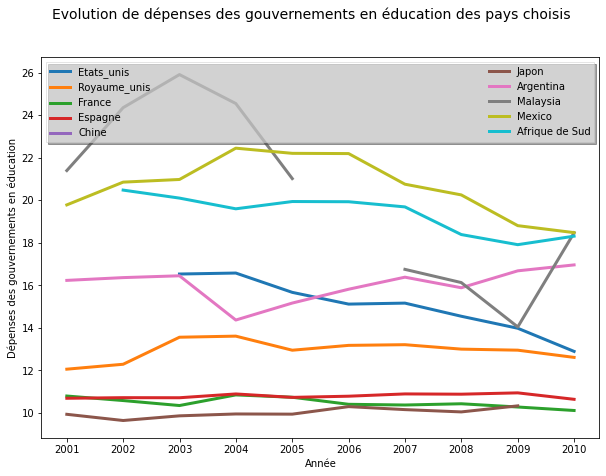

In [134]:
fig = plt.figure(figsize=(10, 7))
fig.suptitle("Evolution de dépenses des gouvernements en éducation des pays choisis", fontsize  = 14)
Date_Deb = datetime.strptime('2000-01-01','%Y-%m-%d')
Date_Fin= datetime.strptime('2009-12-31','%Y-%m-%d')
annees_ref = pd.date_range(Date_Deb,Date_Fin,freq='Y')

Etats_unis   = EducationExpenditure[EducationExpenditure['Country Name'] == 'United States'].loc[:,'2000':'2009']
Royaume_unis = EducationExpenditure[EducationExpenditure['Country Name'] == 'United Kingdom'].loc[:,'2000':'2009']
France       = EducationExpenditure[EducationExpenditure['Country Name'] == 'France'].loc[:,'2000':'2009']
Espagne      = EducationExpenditure[EducationExpenditure['Country Name'] == 'Spain'].loc[:,'2000':'2009']
Chine        = EducationExpenditure[EducationExpenditure['Country Name'] == 'China'].loc[:,'2000':'2009']
Japon        = EducationExpenditure[EducationExpenditure['Country Name'] == 'Japan'].loc[:,'2000':'2009']
Argentina    = EducationExpenditure[EducationExpenditure['Country Name'] == 'Argentina'].loc[:,'2000':'2009']
Malaysia     = EducationExpenditure[EducationExpenditure['Country Name'] == 'Malaysia'].loc[:,'2000':'2009']
Mexico       = EducationExpenditure[EducationExpenditure['Country Name'] == 'Mexico'].loc[:,'2000':'2009']
South_Africa = EducationExpenditure[EducationExpenditure['Country Name'] == 'South Africa'].loc[:,'2000':'2009']


plt.plot(annees_ref,Etats_unis.T,linewidth = 3.0, label='Etats_unis')
plt.plot(annees_ref,Royaume_unis.T,linewidth = 3.0, label='Royaume_unis')

plt.plot(annees_ref,France.T,linewidth = 3.0, label='France')
plt.plot(annees_ref,Espagne.T,linewidth = 3.0, label='Espagne')

plt.plot(annees_ref,Chine.T,linewidth = 3.0, label='Chine')
plt.plot(annees_ref,Japon.T,linewidth = 3.0, label='Japon')
plt.plot(annees_ref,Argentina.T,linewidth = 3.0, label='Argentina')
plt.plot(annees_ref,Malaysia.T,linewidth = 3.0, label='Malaysia')
plt.plot(annees_ref,Mexico.T,linewidth = 3.0, label='Mexico')
plt.plot(annees_ref,South_Africa.T,linewidth = 3.0, label='Afrique de Sud')

plt.xlabel('Année')
plt.ylabel('Dépenses des gouvernements en éducation')

leg = plt.legend(loc='upper center', ncol=2, mode="expand", shadow=True, fancybox=False)
leg.get_frame().set_alpha(0.5)
plt.show()

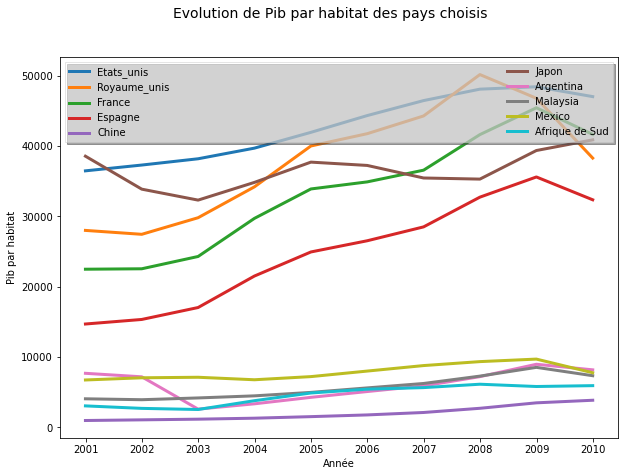

In [135]:
fig = plt.figure(figsize=(10, 7))
fig.suptitle("Evolution de Pib par habitat des pays choisis", fontsize  = 14)
Date_Deb = datetime.strptime('2000-01-01','%Y-%m-%d')
Date_Fin= datetime.strptime('2009-12-31','%Y-%m-%d')
annees_ref = pd.date_range(Date_Deb,Date_Fin,freq='Y')

Etats_unis   = PibHabitat[PibHabitat['Country Name'] == 'United States'].loc[:,'2000':'2009']
Royaume_unis = PibHabitat[PibHabitat['Country Name'] == 'United Kingdom'].loc[:,'2000':'2009']
France       = PibHabitat[PibHabitat['Country Name'] == 'France'].loc[:,'2000':'2009']
Espagne      = PibHabitat[PibHabitat['Country Name'] == 'Spain'].loc[:,'2000':'2009']
Chine        = PibHabitat[PibHabitat['Country Name'] == 'China'].loc[:,'2000':'2009']
Japon        = PibHabitat[PibHabitat['Country Name'] == 'Japan'].loc[:,'2000':'2009']
Argentina    = PibHabitat[PibHabitat['Country Name'] == 'Argentina'].loc[:,'2000':'2009']
Malaysia     = PibHabitat[PibHabitat['Country Name'] == 'Malaysia'].loc[:,'2000':'2009']
Mexico       = PibHabitat[PibHabitat['Country Name'] == 'Mexico'].loc[:,'2000':'2009']
South_Africa = PibHabitat[PibHabitat['Country Name'] == 'South Africa'].loc[:,'2000':'2009']

plt.plot(annees_ref,Etats_unis.T,linewidth = 3.0, label='Etats_unis')
plt.plot(annees_ref,Royaume_unis.T,linewidth = 3.0, label='Royaume_unis')

plt.plot(annees_ref,France.T,linewidth = 3.0, label='France')
plt.plot(annees_ref,Espagne.T,linewidth = 3.0, label='Espagne')

plt.plot(annees_ref,Chine.T,linewidth = 3.0, label='Chine')
plt.plot(annees_ref,Japon.T,linewidth = 3.0, label='Japon')
plt.plot(annees_ref,Argentina.T,linewidth = 3.0, label='Argentina')
plt.plot(annees_ref,Malaysia.T,linewidth = 3.0, label='Malaysia')
plt.plot(annees_ref,Mexico.T,linewidth = 3.0, label='Mexico')
plt.plot(annees_ref,South_Africa.T,linewidth = 3.0, label='Afrique de Sud')

plt.xlabel('Année')
plt.ylabel('Pib par habitat')

leg = plt.legend(loc='upper center', ncol=2, mode="expand", shadow=True, fancybox=False)
leg.get_frame().set_alpha(0.5)
plt.show()

In [136]:
teacherAnnualSalary[teacherAnnualSalary['Country Name'] == 'France'].loc[:,'2000':'2009']

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009
13,22358.454191,24015.623735,25562.512261,26034.58089,25927.575683,25960.40181,26045.008721,26293.989071,26400.451569,27584.565698


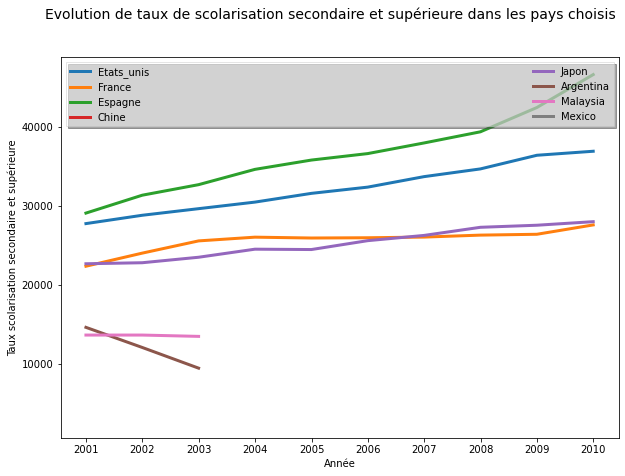

In [137]:
fig = plt.figure(figsize=(10, 7))
fig.suptitle("Evolution de taux de scolarisation secondaire et supérieure dans les pays choisis", fontsize  = 14)
Date_Deb = datetime.strptime('2000-01-01','%Y-%m-%d')
Date_Fin= datetime.strptime('2009-12-31','%Y-%m-%d')
annees_ref = pd.date_range(Date_Deb,Date_Fin,freq='Y')

Etats_unis   = teacherAnnualSalary[teacherAnnualSalary['Country Name'] == 'United States'].loc[:,'2000':'2009']
#Royaume_unis = teacherAnnualSalary[teacherAnnualSalary['Country Name'] == 'United Kingdom'].loc[:,'2000':'2009']
France       = teacherAnnualSalary[teacherAnnualSalary['Country Name'] == 'France'].loc[:,'2000':'2009']
Espagne      = teacherAnnualSalary[teacherAnnualSalary['Country Name'] == 'Spain'].loc[:,'2000':'2009']
Chine        = teacherAnnualSalary[teacherAnnualSalary['Country Name'] == 'China'].loc[:,'2000':'2009']
Japon        = teacherAnnualSalary[teacherAnnualSalary['Country Name'] == 'Japan'].loc[:,'2000':'2009']
Argentina    = teacherAnnualSalary[teacherAnnualSalary['Country Name'] == 'Argentina'].loc[:,'2000':'2009']
Malaysia     = teacherAnnualSalary[teacherAnnualSalary['Country Name'] == 'Malaysia'].loc[:,'2000':'2009']
Mexico       = teacherAnnualSalary[teacherAnnualSalary['Country Name'] == 'Mexico'].loc[:,'2000':'2009']
#South_Africa = teacherAnnualSalary[teacherAnnualSalary['Country Name'] == 'South Africa'].loc[:,'2000':'2009']

plt.plot(annees_ref,Etats_unis.T,linewidth = 3.0, label='Etats_unis')
#plt.plot(annees_ref,Royaume_unis.T,linewidth = 3.0, label='Royaume_unis')

plt.plot(annees_ref,France.T,linewidth = 3.0, label='France')
plt.plot(annees_ref,Espagne.T,linewidth = 3.0, label='Espagne')

plt.plot(annees_ref,Chine.T,linewidth = 3.0, label='Chine')
plt.plot(annees_ref,Japon.T,linewidth = 3.0, label='Japon')
plt.plot(annees_ref,Argentina.T,linewidth = 3.0, label='Argentina')
plt.plot(annees_ref,Malaysia.T,linewidth = 3.0, label='Malaysia')
plt.plot(annees_ref,Mexico.T,linewidth = 3.0, label='Mexico')
#plt.plot(annees_ref,South_Africa.T,linewidth = 3.0, label='Afrique de Sud')

plt.xlabel('Année')
plt.ylabel('Taux scolarisation secondaire et supérieure')

leg = plt.legend(loc='upper center', ncol=2, mode="expand", shadow=True, fancybox=False)
leg.get_frame().set_alpha(0.5)
plt.show()

# 5 Conclusion

Pour conclure, je recommande Academy de prioriser les pays de la liste A pour tout plans/projets court terme, et garder un oeil sur la liste de pays de plan B car ils présentent un véritable pays à potentiel pour les projet moyen et long terme.